# <div style="text-align: right"> Назарьин Артем, НПМбд-02-19 </div>
# <center> Рандомизированное сингулярное разложение </center>


Начнем с определений сингулярного числа, сингулярных векторов и обычного сингулярного разложения:
### Определение
<font size = 4> <p> Пусть матрица <strong> A </strong> порядка <strong> $m\times n$ </strong> состоит из элементов из поля <strong> K </strong>, где <strong> K </strong> — либо поле вещественных чисел, либо поле комплексных чисел. </p>
$\sigma$ называется сингулярным числом матрицы <strong> A </strong>, когда существует два вектора $u \in K^m$ и 
$v \in K^n$:
<p> $Av = \sigma u$, </p>
<p> $A^T u = \sigma v$, </p>
<p> где <strong> u </strong> - левый сингулярный вектор, <strong> v </strong> - правый сингулярный вектор, соответствующий числу $\sigma$. </p>  </font>

### Определение

<font size = 4> <p><strong> Сингулярное разложение </strong> - это разложение прямоугольной вещественной или комплексной матрицы в виде $A =U \Sigma V^T $ , где $\Sigma$ - диагональная <strong> $m\times n$ </strong>-матрица, элементами главной диагонали которой являются сингулярные числа, а матрицы <strong> 𝑈 </strong> порядка <strong> $m\times m$ </strong> и <strong> 𝑉 </strong> порядка <strong> $n\times n$ </strong> состоят из левых и правых сингулярных векторов.</p> </font>

### Пример: проведем сингулярное разложение в Python на матрице малого порядка

<p> Для этого воспользуемся  <strong> np.linalg.svd() </strong>: </p>


In [6]:
import numpy as np

A = np.array([[3, 2],
              [2, 0]])

u, s, v = np.linalg.svd(A, full_matrices = 0)
print('Левые сингулярные векторы:')
print(u)
print()
print('Сингулярные числа:')
print(s)
print()
print('Правые сингулярные векторы:')
print(v)
print()

Левые сингулярные векторы:
[[-0.89442719 -0.4472136 ]
 [-0.4472136   0.89442719]]

Сингулярные числа:
[4. 1.]

Правые сингулярные векторы:
[[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]



In [7]:
import numpy as np
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
u, s, v = np.linalg.svd(A, full_matrices = 0)
print('Левые сингулярные векторы:')
print(u)
print()
print('Сингулярные числа:')
print(s)
print()
print('Правые сингулярные векторы:')
print(v)
print()

Левые сингулярные векторы:
[[-0.37421754  0.28475648 -0.88253894]
 [-0.56470638 -0.82485997 -0.02669705]
 [-0.7355732   0.48838486  0.46948087]]

Сингулярные числа:
[9.34265841 3.24497827 1.08850813]

Правые сингулярные векторы:
[[-0.57847229 -0.61642675 -0.53421706]
 [-0.73171177  0.10269066  0.67383419]
 [ 0.36051032 -0.78068732  0.51045041]]



### Алгоритм рандомизированного сингулярного разложения
![image](rsvd_step1.png)
*Часть 1*
![image](rsvd_step2.png)
*Часть 2*
### <p> Реализация рандомизированного сингулярного разложения в <strong> Python </strong>:

In [8]:
import numpy as np

def rsvd(A, Omega):
    Y = A @ Omega                                       #Умножаем A на Omega
    Q, _ = np.linalg.qr(Y)                              #QR - разложение
    B = Q.T @ A                                         #Находим матрицу B
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0) #применяем SVD к B: находим U~, S, V
    u = Q @ u_tilde                                     #восстанавливаем U
    return u, s, v

np.random.seed(1000)
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])


rank = 2
Omega = np.random.randn(A.shape[1], rank) #задаем матрицу Omega
u, s, v = rsvd(A, Omega)

print('Левые сингулярные векторы:')
print(u)
print()
print('Сингулярные числа::')
print(s)
print()
print('Правые сингулярные векторы:')
print(v)
print()



Левые сингулярные векторы:
[[ 0.38070859  0.60505354]
 [ 0.56830191 -0.74963644]
 [ 0.72944767  0.26824507]]

Сингулярные числа::
[9.34224023 3.02039888]

Правые сингулярные векторы:
[[ 0.57915029  0.61707064  0.53273704]
 [-0.77420021  0.21163814  0.59650929]]



Для улучшения результата рандомизированного сингулярного разложения, можно напрямую использовать степенной метод.

In [9]:
import numpy as np

def power_iteration(A, Omega, power_iter = 3): #степенной метод
    Y = A @ Omega
    for q in range(power_iter):
        Y = A @ (A.T @ Y)
    Q, _ = np.linalg.qr(Y)
    return Q

def rsvd(A, Omega):
    Q = power_iteration(A, Omega)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

np.random.seed(1000)

A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
rank = 2
Omega = np.random.randn(A.shape[1], rank)
u, s, v = rsvd(A, Omega)
print('Левые сингулярные векторы::')
print(u)
print()
print('Сингулярные числа::')
print(s)
print()
print('Правые сингулярные векторы:')
print(v)
print()

Левые сингулярные векторы::
[[ 0.37421757  0.28528579]
 [ 0.56470638 -0.82484381]
 [ 0.73557319  0.48810317]]

Сингулярные числа::
[9.34265841 3.24497775]

Правые сингулярные векторы:
[[ 0.57847229  0.61642675  0.53421706]
 [-0.73178429  0.10284774  0.67373147]]



## Применение (рандомизированного) сингулярного разложения
Сингулярное (и рандомизированное сингулярное) разложение используется для сжатия данных и уменьшения размерности.

In [10]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from PIL import Image

plt.rcParams['figure.figsize'] = [32, 12]
plt.rcParams.update({'font.size': 10})

def power_iteration(X, Omega, power_iter = 2):
    Y = X @ Omega
    for q in range(power_iter):
        Y = X @ (X.T @ Y)
    Q, _ = np.linalg.qr(Y)
    return Q

def rSVD(X, Omega):
    Q = power_iteration(X, Omega)
    B = Q.T @ X
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde  
    return u, s, v

In [19]:
A = Image.open(r'C:\Users\PuerCrouch\mat_pak\cat.jpg')
imggray = A.convert('LA') #convert RGB -> greyscale
X = np.array(list(imggray.getdata(band=0)), float)
X.shape = (imggray.size[1], imggray.size[0])
X = np.matrix(X)

rank = 10
Omega = np.random.randn(X.shape[1], rank)

In [14]:
%time U, S, VT = np.linalg.svd(X, full_matrices = 0) 
%time rU, rS, rVT = rSVD(X, Omega) 

Wall time: 8.9 s
Wall time: 192 ms


In [23]:
XSVD = U[:, :] @ np.diag(S[:]) @ VT[:,:] 
XrSVD = rU[:,:(rank+1)] @ np.diag(rS[:(rank+1)]) @ rVT[:(rank+1),:] 

<function matplotlib.pyplot.show(*args, **kw)>

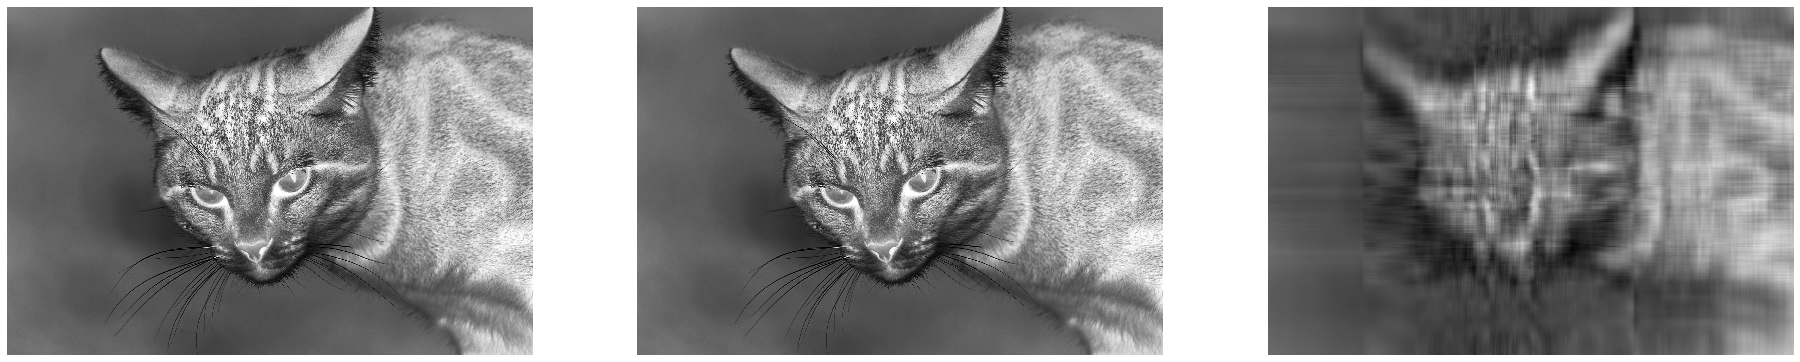

In [24]:
## Plot
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(256-X)
axs[0].axis('off')
axs[1].imshow(256-XSVD)
axs[1].axis('off')
axs[2].imshow(256-XrSVD)
axs[2].axis('off')

plt.show

## Вывод:
Рандомизированное сингулярное разложение позволяет получить точное сжатие изображения за гораздо меньшее время, чем обычное. 

In [ ]:
'''
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from PIL import Image

plt.rcParams['figure.figsize'] = [32, 12]
plt.rcParams.update({'font.size': 10})

def power_iteration(X, Omega, power_iter = 2):
    Y = X @ Omega
    for q in range(power_iter):
        Y = X @ (X.T @ Y)
    Q, _ = np.linalg.qr(Y)
    return Q

def rSVD(X, Omega):
    Q = power_iteration(X, Omega)
    B = Q.T @ X
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde  
    return u, s, v
    
A = Image.open(r'C:\Users\PuerCrouch\mat_pak\cat.jpg')
imggray = A.convert('LA') #convert RGB -> greyscale
X = np.array(list(imggray.getdata(band=0)), float)
X.shape = (imggray.size[1], imggray.size[0])
X = np.matrix(X)

rank = 10
Omega = np.random.randn(X.shape[1], rank)

%time U, S, VT = np.linalg.svd(X, full_matrices = 0) 
%time rU, rS, rVT = rSVD(X, Omega) 

XSVD = U[:, :] @ np.diag(S[:]) @ VT[:,:] 
XrSVD = rU[:,:(rank+1)] @ np.diag(rS[:(rank+1)]) @ rVT[:(rank+1),:] 

## Plot
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(256-X)
axs[0].axis('off')
axs[1].imshow(256-XSVD)
axs[1].axis('off')
axs[2].imshow(256-XrSVD)
axs[2].axis('off')

plt.show
'''